In [2]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import epics
from epics import PV
from time import sleep
import numpy as np
import scipy
from scipy.special import erf

In [48]:
def gauss(x, A, B, C, P):
    """Gausian Function
    Inputs:
        A   Amplitude
        B   x offset
        C   Average width-ish
        P   Power (e.g. 1 for regular gaussian)
    """
    return A*np.exp(-((x-B)**2/C**2)**P)

def cdf(x,alpha=-4.,B=0.):
    """Cumulative distribution function"""
    return (1./2.)*(1 + erf((alpha*(x-B))/np.sqrt(2)))

def asymgau(x, A, B, C, P, alpha=0.):
    """ Asymmetric Gaussian Function
    Inputs:
        x    NumPy 1D Array of inputs to the asymmetric gaussian
    Returns:
        y    NumPy 1D Array of same shape as x
    """
    return 2.*gauss(x, A, B, C, P)*cdf(x,alpha,B)

def PulseGenerator(x):
    """Generates a random 1D array of the assgau() function
    
    Inputs:
        x    NumPy 1D Array of inputs to the asymmetric gaussian
    Returns:
        .... parameters selected randomly for this particular asymmetric gaussian
        y    NumPy 1D Array of same shape as x
    """
    
    A = np.random.choice(np.linspace(0.1,1,100), size=1)[0]
    B = np.random.choice(np.linspace(x.max()/4,3*x.max()/4, 100), size=1)[0]
    C = np.random.choice(np.linspace(x.max()/10,x.max()/4, 100), size=1)[0]
    P = np.random.choice(np.linspace(1,4, 100), size=1)[0]
    #alpha = 0.0
    alpha = np.random.choice(np.linspace(-0.5,0.5, 100), size=1)[0]
    
    pulse0 = np.array(asymgau_normalized(x, A, B, C, P, alpha))
    pulse0_norm = A * pulse0 / pulse0.max() # normalize to clamp this under a value of A
    
    return A, B, C, P, alpha, pulse0_norm

<IPython.core.display.Javascript object>


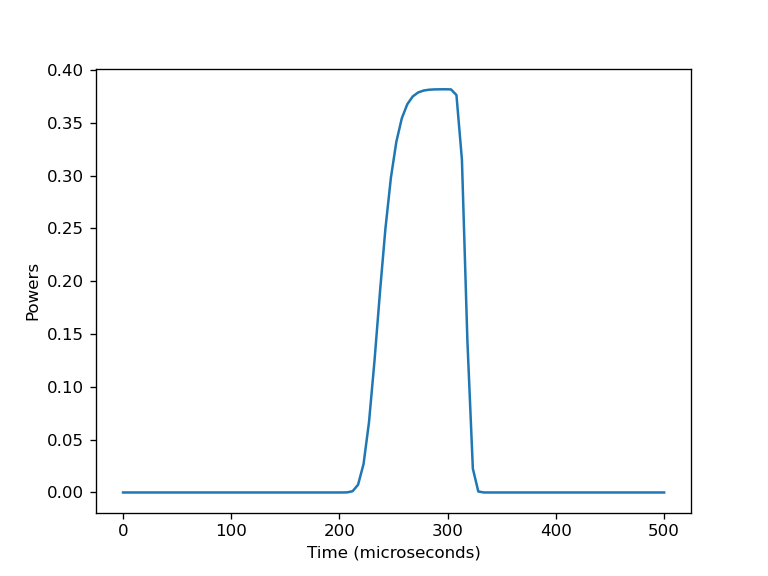

Text(0, 0.5, 'Powers')

In [51]:
NPOINTS = 100

import numpy as np
import matplotlib.pyplot as plt

tvals = np.linspace(0, 500, NPOINTS) # time values for the trace, in microseconds

A, B, C, P, alpha, yvals = PulseGenerator(tvals)

#plt.plot(tvals, yvals)
#plt.xlabel("Time (microseconds)")
#plt.ylabel("Relative laser intensity (a.u.)")


#powers = np.uint8(np.floor(np.round(255 * yvals / np.max(yvals))))
plt.plot(tvals, yvals)
plt.xlabel("Time (microseconds)")
plt.ylabel("Powers")

#plt.plot(tvals, (np.float64(yvals)**2)/255**2)
#plt.plot(tvals, np.sqrt(np.float64(yvals))/np.sqrt(255))


## Set the environment for 100 microsecond timesteps

In [2]:
epics.caput("PROTON:dt:set", 500e-6)
epics.caput("ELECTRON:dt:set", 500e-6)
epics.caput("LASER:powers:dt:set", 500) # sic
epics.caput("PULSEGEN:reprate:set", 10)

cannot connect to LASER:powers:dt:set
cannot connect to PULSEGEN:reprate:set


<IPython.core.display.Javascript object>


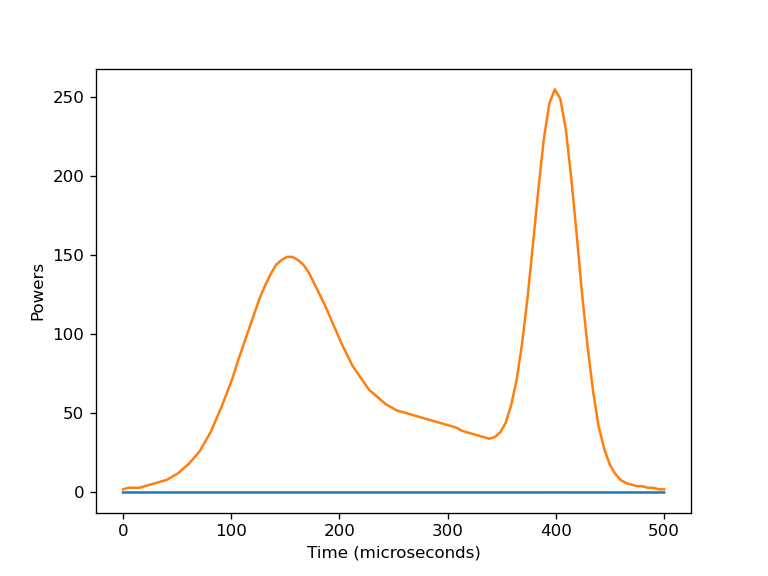

Text(0, 0.5, 'Powers')

In [3]:
NPOINTS = epics.caget("LASER:powers:nt")

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

NPOINTS = 100
tvals = np.linspace(0, 500, NPOINTS) # time values for the trace, in microseconds
sigma, mu = 20.0, 250.0

yvals = np.zeros_like(tvals)

# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
for mean, std in [(150.0, 40.0), (250.0, 100.0), (400, 20.0)]:
    rv = norm(loc = mean, scale = std)
    yvals += rv.pdf(tvals)

plt.plot(tvals, yvals)
plt.xlabel("Time (microseconds)")
plt.ylabel("Relative laser intensity (a.u.)")


powers = np.uint8(np.floor(np.round(255 * yvals / np.max(yvals))))
plt.plot(tvals, powers)
plt.xlabel("Time (microseconds)")
plt.ylabel("Powers")

In [8]:
epics.caget("LASER:powers")

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [19]:
epics.caput("LASER:powers:set", powers)

1

In [14]:
np.zeros(100, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
epics.caput("LASER:powers:set", np.zeros(100, dtype=np.uint8))

1

In [10]:
epics.caget("LASER:powers")

array([  2,   3,   3,   3,   4,   5,   6,   7,   8,  10,  12,  15,  18,
        22,  26,  32,  38,  46,  54,  63,  72,  83,  93, 103, 113, 123,
       131, 138, 144, 147, 149, 149, 147, 144, 139, 132, 125, 118, 110,
       102,  94,  87,  80,  75,  70,  65,  62,  59,  56,  54,  52,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  39,  38,  37,
        36,  35,  34,  35,  38,  44,  55,  71,  94, 123, 157, 192, 224,
       246, 255, 249, 230, 199, 163, 125,  92,  64,  42,  28,  18,  12,
         8,   6,   5,   4,   4,   3,   3,   2,   2])

In [11]:
epics.caget("LASER:powers:set")

array([  2,   3,   3,   3,   4,   5,   6,   7,   8,  10,  12,  15,  18,
        22,  26,  32,  38,  46,  54,  63,  72,  83,  93, 103, 113, 123,
       131, 138, 144, 147, 149, 149, 147, 144, 139, 132, 125, 118, 110,
       102,  94,  87,  80,  75,  70,  65,  62,  59,  56,  54,  52,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  39,  38,  37,
        36,  35,  34,  35,  38,  44,  55,  71,  94, 123, 157, 192, 224,
       246, 255, 249, 230, 199, 163, 125,  92,  64,  42,  28,  18,  12,
         8,   6,   5,   4,   4,   3,   3,   2,   2])